In [1]:
sys.path.insert(0, './common')

import sys
import wave
import a2c_model

c:\Users\nathan\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
env_path = 'no-x/Wave'

In [3]:
env = wave.WaveEnv(env_path, worker_id=5)

WAVE environment created.


In [4]:
hidden_layer = 512
model = a2c_model.A2C(126, 2, hidden_layer, lr=1e-4)

In [7]:
save_path = './results/test/a2c_512nodecay'
model.set_model_save_path(save_path)

In [6]:
model.load_model()

Training history loaded
Model loaded


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


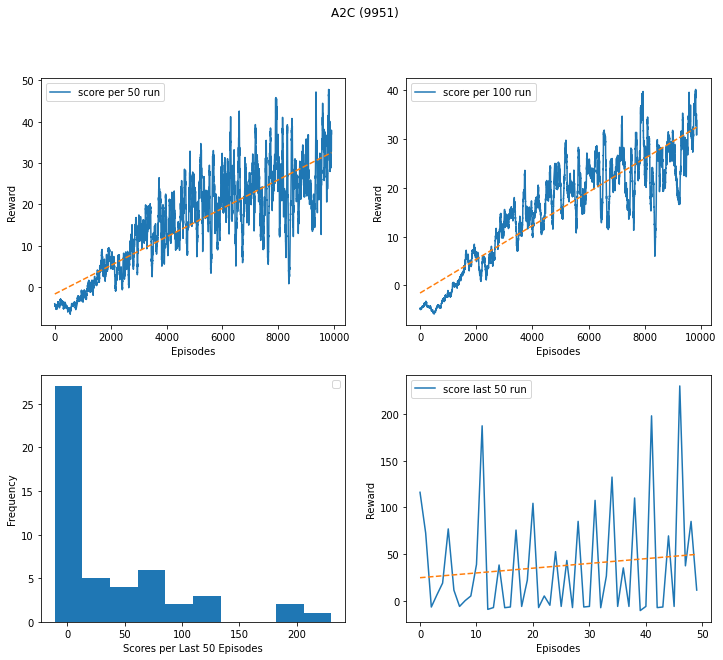

EPOCH: 9950, total reward: 11.309998154640198, timestep: 174
EPOCH: 9951, total reward: 47.50999253988266, timestep: 250
EPOCH: 9952, total reward: 169.99997586011887, timestep: 1000
EPOCH: 9953, total reward: 0.43999822437763214, timestep: 92
EPOCH: 9954, total reward: 43.16999292373657, timestep: 237
EPOCH: 9955, total reward: -9.34999993443489, timestep: 87
EPOCH: 9956, total reward: 93.01998844742775, timestep: 540
EPOCH: 9957, total reward: 209.7999738305807, timestep: 904
EPOCH: 9958, total reward: -7.489999815821648, timestep: 50
EPOCH: 9959, total reward: 26.329997077584267, timestep: 174
EPOCH: 9960, total reward: -6.21999990940094, timestep: 25
EPOCH: 9961, total reward: 31.269995227456093, timestep: 175
EPOCH: 9962, total reward: -7.43999981880188, timestep: 49
EPOCH: 9963, total reward: 6.899997606873512, timestep: 162
EPOCH: 9964, total reward: 56.16999351978302, timestep: 377
EPOCH: 9965, total reward: -7.430000066757202, timestep: 49
EPOCH: 9966, total reward: 46.8599925

In [8]:
model.set_train_params(max_step=1000, plot_smooth=50, gamma=0.99)
model.train(env, 10000, show_plot=True)

In [9]:
model.save_model()

Training history saved


In [3]:
import saver
saver.save_wave_model(hidden_layer, f'{save_path}/actor.pth', f'{save_path}/model.onnx')

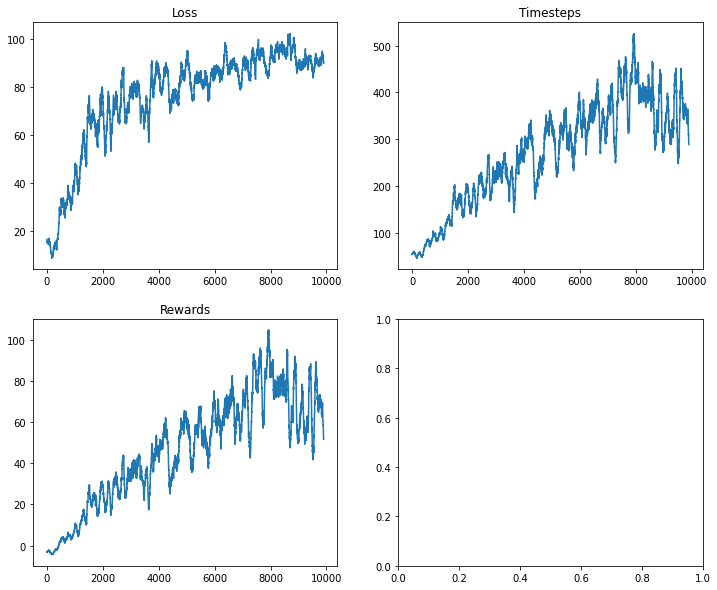

In [8]:
model.plot_train_memory(smooth=100)

In [11]:
env = wave.WaveEnv(env_path, 5, worker_id=1)
model.test(env)

WAVE environment created.


(5.049997612833977, 99)

In [18]:
model.test_avg(lambda time_scale: wave.WaveEnv(env_path, time_scale), 10, 40)

WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.
WAVE environment created.


(11.060092589631676, 124.8)

In [11]:
env.close()